# Assignment 7
### Do any five.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from skimpy import skim

np.random.seed(5030)


## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

In [16]:
# Part 1
ev_single_die = np.mean([1, 2, 3, 4, 5, 6])
print(f"1. Expected value of one dice: {ev_single_die}")

# Part 2
ev_two_dice = 2 * ev_single_die
print(f"2. Expected value of two dice: {ev_two_dice}")

# Part 3
prob_win = 1/37
prob_lose = 36/37
ev_roulette = prob_win * 35 + prob_lose * (-1)
print(f"3. Expected winnings in European roulette (betting $1 on a number) is ${ev_roulette}")

# Part 4
ev_reroll_once = (1 + 2 + 3 + 4 + 5 + (6 + ev_single_die)) / 6
print(f"4. Expected value with one reroll on 6: {ev_reroll_once}")

# Part 5
def roll_until_not_six():
    total = 0
    while True:
        roll = np.random.randint(1, 7)
        total += roll
        if roll != 6:
            break
    return total

simulated_values = [roll_until_not_six() for _ in range(100000)]
ev_continuous_reroll = np.mean(simulated_values)
print(f"5. Expected value with continuous reroll (simulated): {ev_continuous_reroll}")

1. Expected value of one dice: 3.5
2. Expected value of two dice: 7.0
3. Expected winnings in European roulette (betting $1 on a number) is $-0.027027027027026973
4. Expected value with one reroll on 6: 4.083333333333333
5. Expected value with continuous reroll (simulated): 4.20131


## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

In [29]:
# Part 1
a, b = 0, 10
ev_uniform = (a + b) / 2
print(f"\n1. Expected value of Uniform({a},{b}): {ev_uniform}")

# Part 2
print(f"\n2. Showing E[a + bX] = a + b*E[X]:")
a_const, b_const = 5, 3
X_samples = np.random.normal(10, 2, 100000)
transformed = a_const + b_const * X_samples

print(f"E[X] = {np.mean(X_samples)}")
print(f"E[{a_const} + {b_const}X] = {np.mean(transformed)}")
print(f"{a_const} + {b_const}*E[X] = {a_const + b_const * np.mean(X_samples)}")

# Part 3
print(f"\n3. Showing v(E[X]) ≠ E[v(X)] for v(x) = x^2:")
X_samples = np.random.uniform(0, 10, 100000)
v_of_ex = np.mean(X_samples) ** 2  # v(E[X])
e_of_vx = np.mean(X_samples ** 2)   # E[v(X)]

print(f"v(E[X]) = (E[X])^2 = {v_of_ex}")
print(f"E[v(X)] = E[X^2] = {e_of_vx}")
print(f"Difference: {abs(v_of_ex - e_of_vx)}")



1. Expected value of Uniform(0,10): 5.0

2. Showing E[a + bX] = a + b*E[X]:
E[X] = 10.013879412880307
E[5 + 3X] = 35.04163823864093
5 + 3*E[X] = 35.04163823864092

3. Showing v(E[X]) ≠ E[v(X)] for v(x) = x^2:
v(E[X]) = (E[X])^2 = 24.92304701394436
E[v(X)] = E[X^2] = 33.31045004430594
Difference: 8.387403030361579


## 3. 
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

In [35]:
# Generate a random variable
X = np.random.normal(10, 3, 100000)
mu_X = np.mean(X)
sigma_X = np.std(X, ddof=1)

# Part 1 and 2 expectation and variance of epsilon
epsilon = X - mu_X
print(f"\nPart 1-2")
print(f"E[e] = {np.mean(epsilon)} (should be 0)")
print(f"V[e] = {np.var(epsilon, ddof=1)} (should equal V[X] = {sigma_X**2})")

# Part 3 Write X = E[X] + e
X_reconstructed = mu_X + epsilon
print(f"\nPart 3")
print(f"Original X mean: {np.mean(X)}")
print(f"Reconstructed X mean: {np.mean(X_reconstructed)}")

# Part 4 Standardize epsilon
epsilon_standardized = epsilon / sigma_X
print(f"\nPart 4")
print(f"E[e_standardized] = {np.mean(epsilon_standardized)}")
print(f"V[e_standardized] = {np.var(epsilon_standardized, ddof=1)}")

X_reconstructed2 = mu_X + sigma_X * epsilon_standardized
print(f"Original X mean: {np.mean(X)}")
print(f"Reconstructed X mean: {np.mean(X_reconstructed2)}")

# Part 5 Replace E[X] with xβ for regression
print(f"\nPart 5")
print(f"where xB is the conditional expectation E[X|x]")
print(f"and ε captures random variation around the mean")



Part 1-2
E[e] = -9.197265171678737e-16 (should be 0)
V[e] = 8.990565802566511 (should equal V[X] = 8.990565802566511)

Part 3
Original X mean: 9.99951814697639
Reconstructed X mean: 9.99951814697639

Part 4
E[e_standardized] = -3.068123533012113e-16
V[e_standardized] = 1.0
Original X mean: 9.99951814697639
Reconstructed X mean: 9.99951814697639

Part 5
where xB is the conditional expectation E[X|x]
and ε captures random variation around the mean


## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

## 7.
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.


1. Likelihood for Binomial:
L(p) = ∏ p^yi * (1-p)^(1-yi)
log L(p) = ∑ [yi*log(p) + (1-yi)*log(1-p)]
l'(p) = ∑[yi/p-(1-yi)/(1-p)]
set to 0 and solve for first order condition
p̂ = 1/n ∑[yi]

2. MLE for p:
n = 1343
Number with radiation therapy = 886
p̂ = 886/1343 = 0.659717051377513

3. Bootstrap sampling distribution of p̂:


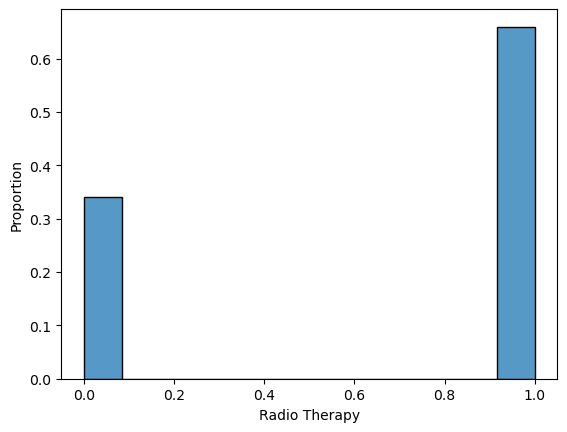

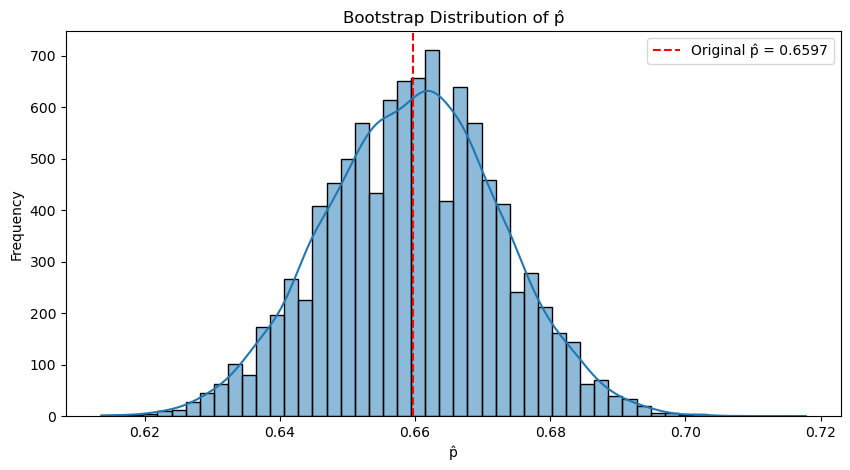

Bootstrap mean: 0.6596593447505584
Bootstrap SE: 0.012926282159198717
95% CI: [0.6344005956813105, 0.6843075204765448]


In [46]:
df = pd.read_csv('/Users/samuelaridi/Downloads/understanding_uncertainty/data/metabric.csv', low_memory=False)
y = (df['Radio Therapy'] == 'YES').astype(int)
sns.histplot(y,stat='proportion')

# Part 1: Likelihood function
print("\n1. Likelihood for Binomial:")
print("L(p) = ∏ p^yi * (1-p)^(1-yi)")
print("log L(p) = ∑ [yi*log(p) + (1-yi)*log(1-p)]")
print("l'(p) = ∑[yi/p-(1-yi)/(1-p)]")
print("set to 0 and solve for first order condition")
print("p̂ = 1/n ∑[yi]")

# Part 2: MLE
n = len(y)
successes = np.sum(y)
p_hat = successes / n

print(f"\n2. MLE for p:")
print(f"n = {n}")
print(f"Number with radiation therapy = {successes}")
print(f"p̂ = {successes}/{n} = {p_hat}")

# Part 3: Bootstrap the sampling distribution
print(f"\n3. Bootstrap sampling distribution of p̂:")

n_bootstrap = 10000
p_hat_bootstrap = []

for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(y, size=len(y), replace=True)
    p_hat_bootstrap.append(np.mean(bootstrap_sample))

p_hat_bootstrap = np.array(p_hat_bootstrap)

plt.figure(figsize=(10, 5))
sns.histplot(p_hat_bootstrap, bins=50, kde=True)
plt.axvline(p_hat, color='red', linestyle='--', label=f'Original p̂ = {p_hat:.4f}')
plt.title('Bootstrap Distribution of p̂')
plt.xlabel('p̂')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Bootstrap mean: {np.mean(p_hat_bootstrap)}")
print(f"Bootstrap SE: {np.std(p_hat_bootstrap)}")
print(f"95% CI: [{np.percentile(p_hat_bootstrap, 2.5)}, {np.percentile(p_hat_bootstrap, 97.5)}]")

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.


1. Distribution of Total Rooms Above Ground:


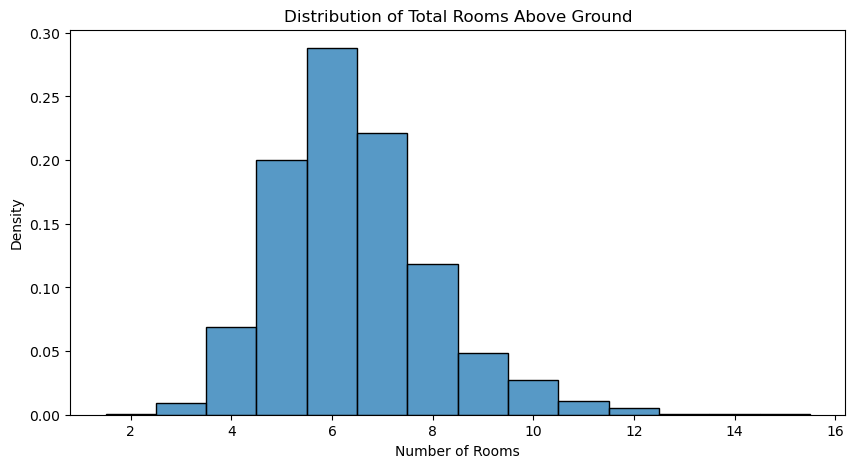


2. Poisson Likelihood:
P(Y=k) = (λ^k * e^(-λ))/k!
L(λ) = ∏ (λ^yi * e^(-λ))/yi!
log L(λ) = ∑ [yi*log(λ) - λ - log(yi!)]

3. MLE for λ:
λ̂ = sample mean = 6.4430

4. Fitted Poisson distribution vs Data:


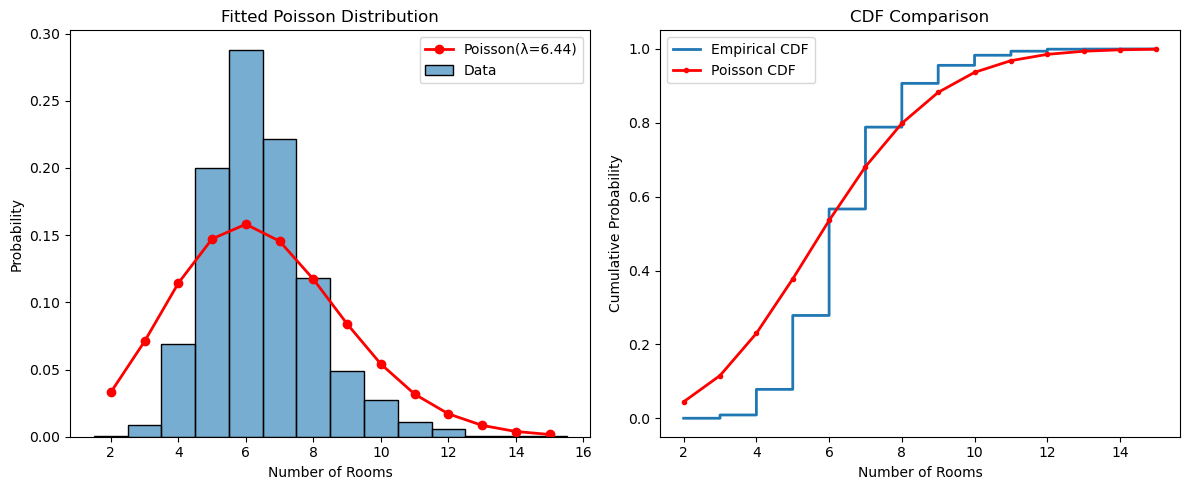

The Poisson model fits the data reasonably well, capturing the general shape of the distribution and CDF.

5. Bootstrap sampling distribution:


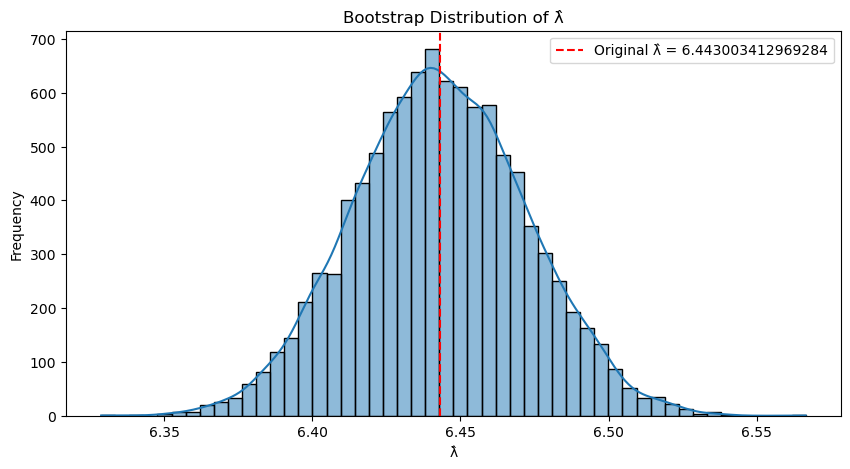

Bootstrap mean: 6.443000204778158
Bootstrap SE: 0.029164234338952547
95% CI: [6.386348122866894, 6.5]


In [60]:
df = pd.read_csv('/Users/samuelaridi/Downloads/understanding_uncertainty/data/ames_prices.csv')
y = df['TotRms.AbvGrd'].dropna()

# Part 1: Plot distribution
print("\n1. Distribution of Total Rooms Above Ground:")
plt.figure(figsize=(10, 5))
sns.histplot(y, bins=range(int(y.min()), int(y.max())+2), discrete=True, stat='density')
plt.title('Distribution of Total Rooms Above Ground')
plt.xlabel('Number of Rooms')
plt.ylabel('Density')
plt.show()

# Part 2: Likelihood function
print("\n2. Poisson Likelihood:")
print("P(Y=k) = (λ^k * e^(-λ))/k!")
print("L(λ) = ∏ (λ^yi * e^(-λ))/yi!")
print("log L(λ) = ∑ [yi*log(λ) - λ - log(yi!)]")

# Part 3: Maximize likelihood
lambda_hat = np.mean(y)
print(f"\n3. MLE for λ:")
print(f"λ̂ = sample mean = {lambda_hat:.4f}")

# Part 4: Plot density
print(f"\n4. Fitted Poisson distribution vs Data:")
x_range = np.arange(y.min(), y.max()+1)
poisson_pmf = stats.poisson.pmf(x_range, lambda_hat)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(y, bins=range(int(y.min()), int(y.max())+2), discrete=True, 
             stat='density', alpha=0.6, label='Data')
plt.plot(x_range, poisson_pmf, 'ro-', label=f'Poisson(λ={lambda_hat:.2f})', linewidth=2)
plt.title('Fitted Poisson Distribution')
plt.xlabel('Number of Rooms')
plt.ylabel('Probability')
plt.legend()

plt.subplot(1, 2, 2)
sorted_y = np.sort(y)
ecdf = np.arange(1, len(sorted_y)+1) / len(sorted_y)
plt.step(sorted_y, ecdf, where='post', label='Empirical CDF', linewidth=2)

poisson_cdf = stats.poisson.cdf(x_range, lambda_hat)
plt.plot(x_range, poisson_cdf, 'r.-', label=f'Poisson CDF', linewidth=2)
plt.title('CDF Comparison')
plt.xlabel('Number of Rooms')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.tight_layout()
plt.show()

print("The Poisson model fits the data reasonably well, capturing the general shape of the distribution and CDF.")

# Part 5: Bootstrap
print(f"\n5. Bootstrap sampling distribution:")

n_bootstrap = 10000
lambda_hat_bootstrap = []

for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(y, size=len(y), replace=True)
    lambda_hat_bootstrap.append(np.mean(bootstrap_sample))

lambda_hat_bootstrap = np.array(lambda_hat_bootstrap)

plt.figure(figsize=(10, 5))
sns.histplot(lambda_hat_bootstrap, bins=50, kde=True)
plt.axvline(lambda_hat, color='red', linestyle='--', label=f'Original λ̂ = {lambda_hat}')
plt.title('Bootstrap Distribution of λ̂')
plt.xlabel('λ̂')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Bootstrap mean: {np.mean(lambda_hat_bootstrap)}")
print(f"Bootstrap SE: {np.std(lambda_hat_bootstrap)}")
print(f"95% CI: [{np.percentile(lambda_hat_bootstrap, 2.5)}, {np.percentile(lambda_hat_bootstrap, 97.5)}]")


## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.